In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
data=pd.read_csv('Bengaluru_House_Data.csv')

In [41]:
data=data.drop(['availability','society','area_type','balcony'],axis='columns')
data.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [42]:
data.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [43]:
data=data.dropna()

In [44]:
data.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [45]:
data['BHK']=data['size'].apply(lambda x:int(x.split(' ')[0]))

In [46]:
data

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [47]:
m=data['total_sqft'].str.split('-')
m=m.reset_index()
m=m['total_sqft']
m

0        [1056]
1        [2600]
2        [1440]
3        [1521]
4        [1200]
          ...  
13241    [3453]
13242    [3600]
13243    [1141]
13244    [4689]
13245     [550]
Name: total_sqft, Length: 13246, dtype: object

In [48]:
l=[]
for i in range(13246):
    if len(m[i])>1:
        z=(float(m[i][0])+float(m[i][1]))/2
        l.append(z)
    else:
        z=''.join(filter(str.isdigit,m[i][0]))
        l.append(z)

In [49]:
data['total_sqft']=l
data['total_sqft']=data['total_sqft'].astype('float64')

In [50]:
data['price_per_sqft']=data['price']*100000/data['total_sqft']
data.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [51]:
data.location=data.location.apply(lambda x: x.strip())

In [52]:
location_stats=data.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [53]:
location_stats_less_then_10=location_stats[location_stats<=10]
location_stats_less_then_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [54]:
data.location=data.location.apply(lambda x: 'other' if x in location_stats_less_then_10 else x)
len(data.location.unique())

242

In [55]:
def remove_outlier(data):
    data_out=pd.DataFrame()
    for keys,gp in data.groupby('location'):
        m=np.mean(gp['price_per_sqft'])
        st=np.std(gp['price_per_sqft'])
        reduced=gp[(gp['price_per_sqft']>(m-st)) &(gp['price_per_sqft']<=(m+st))]
        data_out=pd.concat([data_out,reduced],ignore_index=True)
    return data_out

In [56]:
data_o=remove_outlier(data)

In [57]:
data1=data_o.copy()
data1

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,6 BHK,1200.0,6.0,125.00,6,10416.666667
3,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
4,1st Block Jayanagar,7 Bedroom,930.0,4.0,85.00,7,9139.784946
...,...,...,...,...,...,...,...
11637,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
11638,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
11639,other,2 BHK,1075.0,2.0,48.00,2,4465.116279
11640,other,4 Bedroom,1200.0,5.0,325.00,4,27083.333333


In [58]:
def plot_scatter_chart(df,location):
    plt.figure(figsize=(9,8))
    BHK2=data[(data.location==location)&(data.BHK==2)]
    BHK3=data[(data.location==location)&(data.BHK==3)]
    plt.scatter(BHK2.total_sqft,BHK2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(BHK3.total_sqft,BHK3.price,marker='+',color='green',label='3 BHK',s=50)
    plt.xlabel('Total square feet Area')
    plt.ylabel('Price per square feet')
    plt.title(location)
    plt.legend()

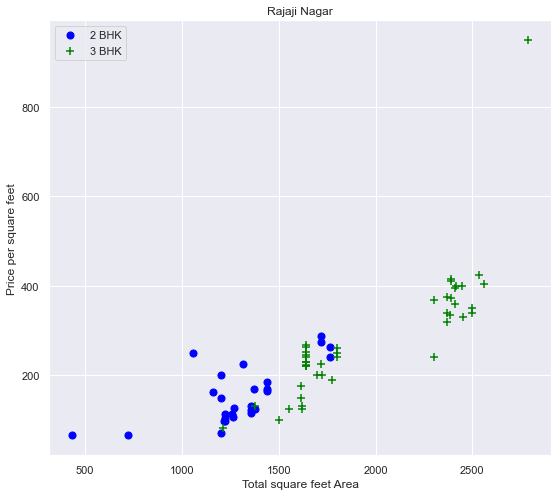

In [59]:
plot_scatter_chart(data,'Rajaji Nagar')

In [60]:
a=data1[(data1['BHK']==2)]
a

,location,size,total_sqft,bath,price,BHK,price_per_sqft
7,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
16,1st Phase JP Nagar,2 BHK,1394.0,2.0,100.0,2,7173.601148
17,1st Phase JP Nagar,2 BHK,1077.0,2.0,93.0,2,8635.097493
18,1st Phase JP Nagar,2 Bedroom,1566.0,2.0,180.0,2,11494.252874
22,1st Phase JP Nagar,2 BHK,1180.0,2.0,88.5,2,7500.000000
...,...,...,...,...,...,...,...
11631,other,2 BHK,1140.0,1.0,185.0,2,16228.070175
11632,other,2 BHK,1095.0,2.0,57.0,2,5205.479452
11634,other,2 BHK,1256.0,2.0,65.0,2,5175.159236
11636,other,2 BHK,1353.0,2.0,110.0,2,8130.081301


In [61]:
b=data1[(data1['BHK']==3)]
b

,location,size,total_sqft,bath,price,BHK,price_per_sqft
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
3,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
6,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333
11,1st Phase JP Nagar,3 BHK,1875.0,3.0,167.00,3,8906.666667
13,1st Phase JP Nagar,3 BHK,2065.0,4.0,210.00,3,10169.491525
...,...,...,...,...,...,...,...
11618,other,3 BHK,1500.0,2.0,78.00,3,5200.000000
11625,other,3 BHK,1508.0,3.0,77.00,3,5106.100796
11626,other,3 BHK,1903.0,2.0,293.00,3,15396.741986
11630,other,3 Bedroom,2000.0,2.0,360.00,3,18000.000000


In [62]:
a['location'].value_counts()[1:8].index

Index(['Whitefield', 'Electronic City', 'Sarjapur  Road', 'Kanakpura Road',
       'Raja Rajeshwari Nagar', 'Thanisandra', 'Yelahanka'],
      dtype='object')

In [63]:
a['location'].value_counts()[1:8].index

Index(['Whitefield', 'Electronic City', 'Sarjapur  Road', 'Kanakpura Road',
       'Raja Rajeshwari Nagar', 'Thanisandra', 'Yelahanka'],
      dtype='object')

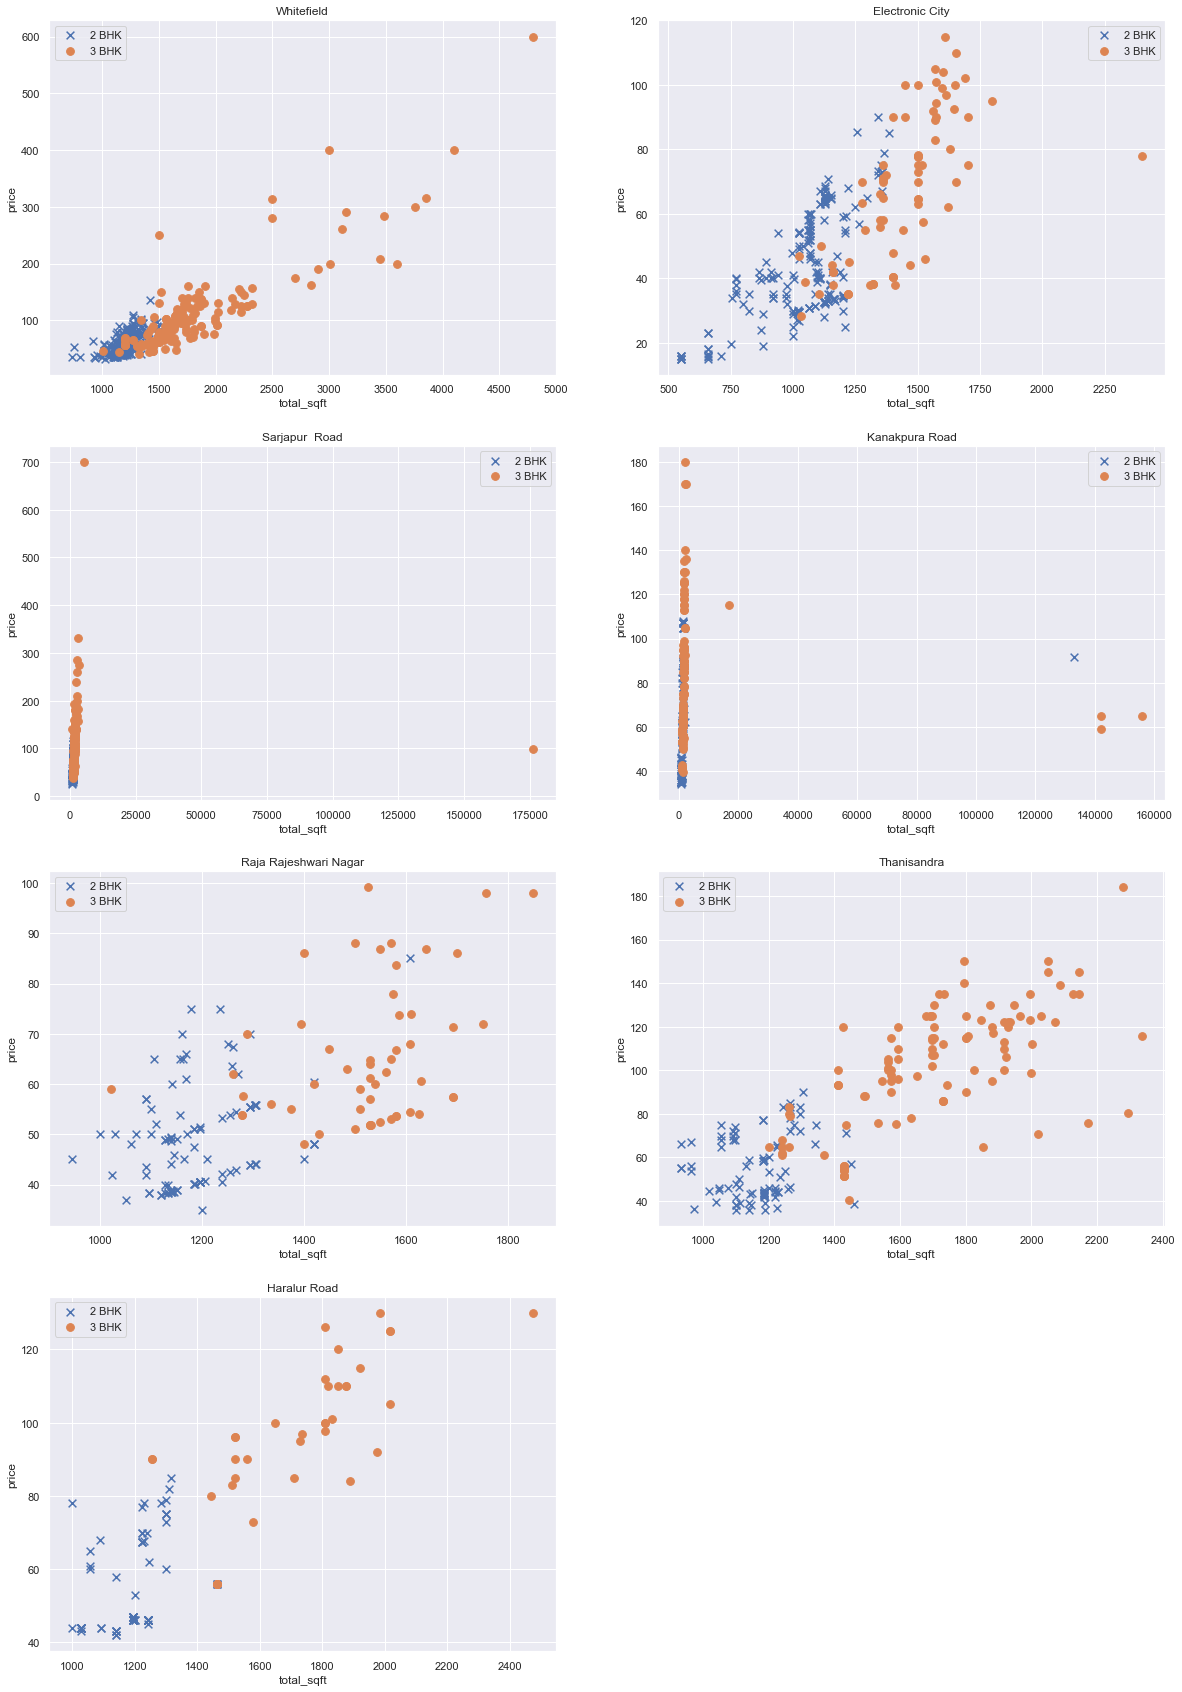

In [64]:
sns.set(rc={'figure.figsize':(20,30)})
pn=1
for i in ['Whitefield', 'Electronic City', 'Sarjapur  Road', 'Kanakpura Road',
       'Raja Rajeshwari Nagar', 'Thanisandra', 'Haralur Road']:
    plt.subplot(4,2,pn)
    plt.scatter(x=a[a['location']==i]['total_sqft'],y=a[a['location']==i]['price'],label='2 BHK',s=60,marker='x')
    plt.scatter(x=b[b['location']==i]['total_sqft'],y=b[b['location']==i]['price'],label='3 BHK',marker='o',s=60)
    plt.xlabel('total_sqft')
    plt.ylabel('price')
    plt.title(i)
    plt.legend()
    pn+=1
    

In [65]:
data1

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,6 BHK,1200.0,6.0,125.00,6,10416.666667
3,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
4,1st Block Jayanagar,7 Bedroom,930.0,4.0,85.00,7,9139.784946
...,...,...,...,...,...,...,...
11637,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
11638,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
11639,other,2 BHK,1075.0,2.0,48.00,2,4465.116279
11640,other,4 Bedroom,1200.0,5.0,325.00,4,27083.333333


In [66]:
data1=data1.sort_values(by='BHK')
data1=data1.reset_index(drop=True)
data1[data1['BHK']==2]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
565,Nagarbhavi,2 BHK,1055.0,2.0,55.00,2,5213.270142
566,Raja Rajeshwari Nagar,2 BHK,1267.0,2.0,54.35,2,4289.660616
567,Sarjapur,2 BHK,1124.0,2.0,30.35,2,2700.177936
568,Sarjapur,2 BHK,1044.0,2.0,32.00,2,3065.134100
569,other,2 Bedroom,1300.0,2.0,95.00,2,7307.692308
...,...,...,...,...,...,...,...
5638,Bommanahalli,2 BHK,1090.0,3.0,44.00,2,4036.697248
5639,Hennur Road,2 BHK,1317.5,2.0,63.77,2,4840.227704
5640,Hebbal,2 BHK,1299.0,2.0,97.00,2,7467.282525
5641,Hennur Road,2 BHK,1385.0,2.0,83.09,2,5999.277978


In [67]:
data0=data1.head(565)
data0

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Kumaraswami Layout,1 Bedroom,850.0,1.0,78.0,1,9176.470588
1,Attibele,1 BHK,450.0,1.0,11.0,1,2444.444444
2,Rachenahalli,1 BHK,690.0,1.0,39.8,1,5768.115942
3,Attibele,1 BHK,400.0,1.0,11.0,1,2750.000000
4,Attibele,1 BHK,400.0,1.0,12.0,1,3000.000000
...,...,...,...,...,...,...,...
560,other,1 BHK,900.0,1.0,30.0,1,3333.333333
561,Electronic City,1 RK,550.0,1.0,27.0,1,4909.090909
562,other,1 BHK,500.0,1.0,24.0,1,4800.000000
563,other,1 BHK,650.0,1.0,30.0,1,4615.384615


In [68]:
data0['price_per_sqft'].mean()

5793.02041517332

In [69]:
a=data1[(data1['BHK']==2) & (data1['price_per_sqft']<5793.020415173318)].index

In [70]:
a

Int64Index([ 565,  566,  567,  568,  570,  572,  575,  576,  577,  579,
            ...
            5629, 5630, 5632, 5633, 5634, 5635, 5637, 5638, 5639, 5642],
           dtype='int64', length=3773)

In [71]:
data1=data1.drop(index=a)

In [72]:
data1

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Kumaraswami Layout,1 Bedroom,850.0,1.0,78.0,1,9176.470588
1,Attibele,1 BHK,450.0,1.0,11.0,1,2444.444444
2,Rachenahalli,1 BHK,690.0,1.0,39.8,1,5768.115942
3,Attibele,1 BHK,400.0,1.0,11.0,1,2750.000000
4,Attibele,1 BHK,400.0,1.0,12.0,1,3000.000000
...,...,...,...,...,...,...,...
11637,other,14 BHK,1250.0,15.0,125.0,14,10000.000000
11638,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
11639,other,18 Bedroom,1200.0,18.0,200.0,18,16666.666667
11640,other,19 BHK,2000.0,16.0,490.0,19,24500.000000


C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

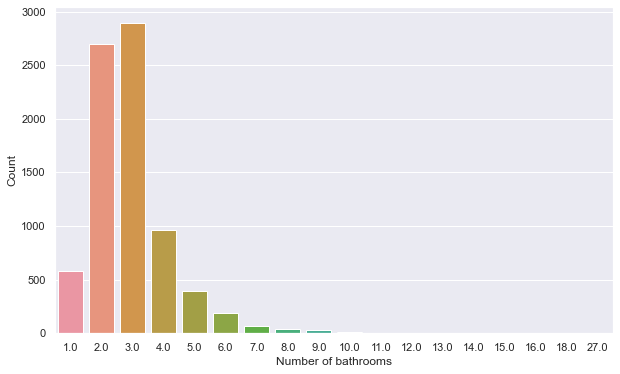

In [73]:
plt.figure(figsize=(10,6))
sns.countplot(data1.bath)
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')

In [74]:
b=data1[data1['bath']>data1['BHK']+2].index

In [75]:
data1=data1.drop(index=b)

In [76]:
data1

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Kumaraswami Layout,1 Bedroom,850.0,1.0,78.0,1,9176.470588
1,Attibele,1 BHK,450.0,1.0,11.0,1,2444.444444
2,Rachenahalli,1 BHK,690.0,1.0,39.8,1,5768.115942
3,Attibele,1 BHK,400.0,1.0,11.0,1,2750.000000
4,Attibele,1 BHK,400.0,1.0,12.0,1,3000.000000
...,...,...,...,...,...,...,...
11637,other,14 BHK,1250.0,15.0,125.0,14,10000.000000
11638,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
11639,other,18 Bedroom,1200.0,18.0,200.0,18,16666.666667
11640,other,19 BHK,2000.0,16.0,490.0,19,24500.000000


In [78]:
dummies=pd.get_dummies(data1['location'])
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11637,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11639,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11640,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [79]:
data_f=pd.concat([data1,dummies.drop('other',axis=1)],axis=1)
data_f

,location,size,total_sqft,bath,price,BHK,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Kumaraswami Layout,1 Bedroom,850.0,1.0,78.0,1,9176.470588,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Attibele,1 BHK,450.0,1.0,11.0,1,2444.444444,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Rachenahalli,1 BHK,690.0,1.0,39.8,1,5768.115942,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Attibele,1 BHK,400.0,1.0,11.0,1,2750.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Attibele,1 BHK,400.0,1.0,12.0,1,3000.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11637,other,14 BHK,1250.0,15.0,125.0,14,10000.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11638,other,16 BHK,10000.0,16.0,550.0,16,5500.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11639,other,18 Bedroom,1200.0,18.0,200.0,18,16666.666667,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11640,other,19 BHK,2000.0,16.0,490.0,19,24500.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
data_f=data_f.drop('location',axis=1)
data_f

,size,total_sqft,bath,price,BHK,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1 Bedroom,850.0,1.0,78.0,1,9176.470588,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1 BHK,450.0,1.0,11.0,1,2444.444444,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1 BHK,690.0,1.0,39.8,1,5768.115942,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1 BHK,400.0,1.0,11.0,1,2750.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1 BHK,400.0,1.0,12.0,1,3000.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11637,14 BHK,1250.0,15.0,125.0,14,10000.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11638,16 BHK,10000.0,16.0,550.0,16,5500.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11639,18 Bedroom,1200.0,18.0,200.0,18,16666.666667,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11640,19 BHK,2000.0,16.0,490.0,19,24500.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
x=data_f.drop(['price','size'],axis=1)
y=data_f['price']

In [90]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [92]:
rf=RandomForestRegressor()

In [93]:
model=rf.fit(x_train,y_train)

In [95]:
rf.score(x_train,y_train)

0.9963623419751273

In [96]:
rf.score(x_test,y_test)

0.8987631271188677

In [101]:
y_pred=model.predict(x_test)

In [102]:
from sklearn.metrics import mean_squared_error,r2_score

In [103]:
print(np.sqrt(mean_squared_error(y_pred,y_test)))

56.54624825171415


In [104]:
print(r2_score(y_test,y_pred))

0.8987631271188677


In [106]:
pred_values=pd.DataFrame({'Actual':y_test,'Pred':y_pred})
pred_values

,Actual,Pred
4204,82.00,82.44080
10631,130.00,129.81000
7343,240.00,237.72000
134,14.04,13.73630
10206,95.00,94.99410
...,...,...
8250,108.00,108.75000
161,28.00,28.47280
3110,95.00,95.15000
457,36.00,35.85315
